<a href="https://colab.research.google.com/github/Sairindhrijena/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name-Health-Insurance-Cross-Sell-Prediction**
**Project Type**-Classification

**Contribution**-Indivisual

# **Project Summary**


*   Health insurance plans in India are basic indemnity-based insurance products, which are specifically designed to provide financial assistance against medical expenses incurred in case of hospitalization or critical illnesses.
*   There are multiple factors that play a major role in capturing customers for any insurance policy. Here we have information about demographics such as age, gender, region code, and vehicle damage, vehicle age, annual premium, policy sourcing channel. Based on the previous trend, this data analysis and prediction with machine learning models can help us understand what are the reasons for news popularity on social media and obtain the best classification model.


*   We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. We have 381109 data points available.


*  Predicting whether a customer would be interested in buying Vehicle Insurance so that the company can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.










# **GitHub Link :-**

# **Problem Statement:-**

> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.



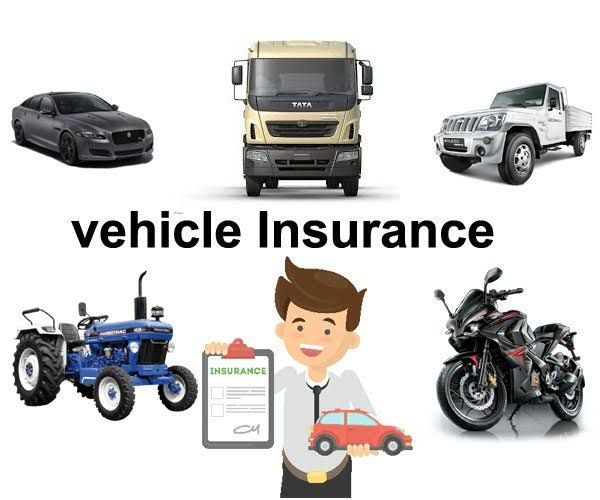

#**Let's Begin**

##**1. Know Your Data**

###**Import Libraries**

In [1]:

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings;warnings.simplefilter('ignore')
import time

###**Dataset Loading**

In [2]:
#Load Dataset
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECT-3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

###**Dataset First View**

In [3]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


###**Dataset Rows & Columns count**

In [4]:

# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 381109 and no of columns is 12


###**Dataset Information**

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


###**Duplicate Values**

In [6]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {data.duplicated().sum()}')

The number of duplicate rows are 0


###**Missing Values/Null Values**

In [7]:
# Missing Values/Null Values Count
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

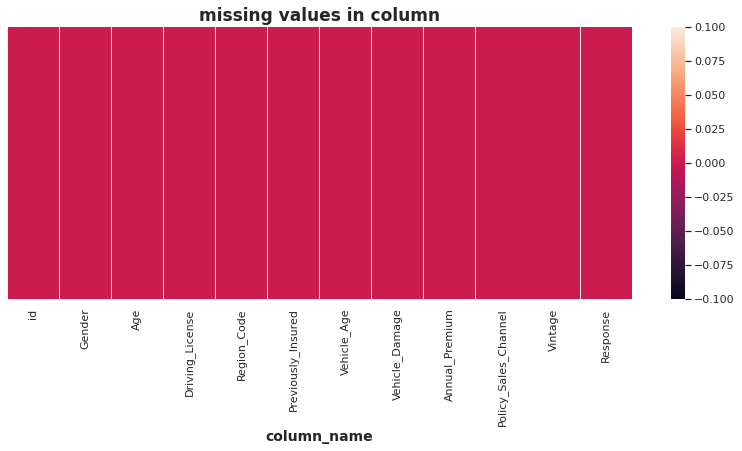

In [8]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

###**What did you know about your dataset?**



*   The dataset given is a dataset from Health Insurance industry, and we have to analysis the response of customers and the insights behind it.
*   Sell prediction is analytical studies on the possibility of a customer abandoning service. The goal is to understand and take steps to change it before the costumer gives up the service.


*   The above dataset has 381109 rows and 12 columns. There are no mising values and duplicate values in the dataset.





# **2. Understanding Your Variables**

In [9]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


##**Variables Description**